# Mick Schumacher
<img src="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/image.img.1920.medium.jpg/1641824836549.jpg" width="300">

### Team: Haas F1 Team

<img src ="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/helmet.img.png/1617101189118.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

msc_laps <- lap_data %>%
            filter(driverId == 854)

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1052,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5777320,96.28867,1.604811


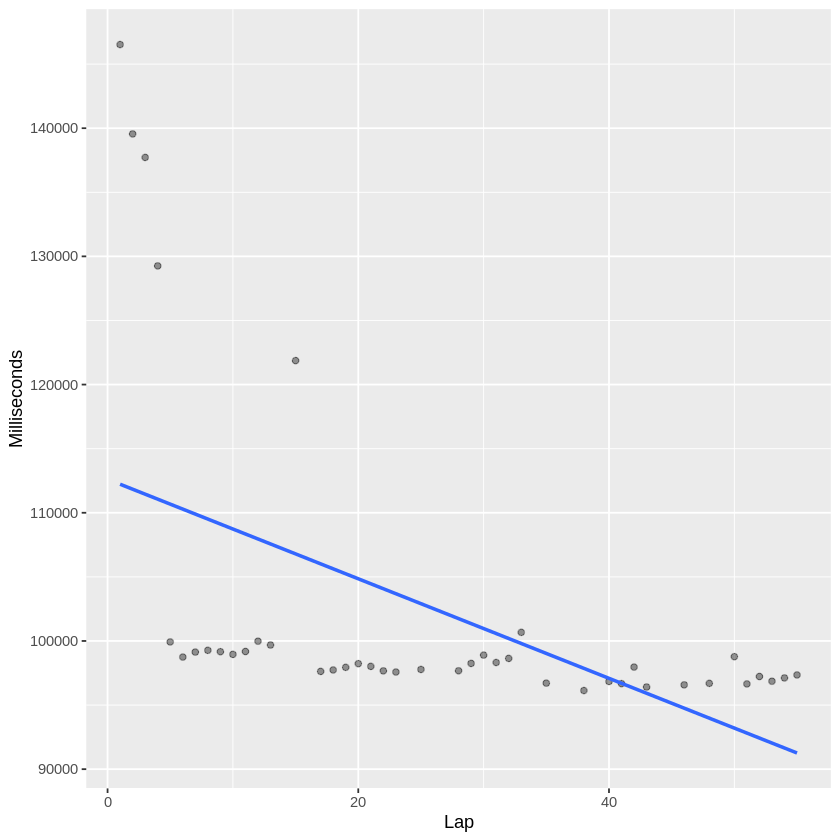

In [4]:
#1. BAHRAIN 

ms_bahrain <- msc_laps %>%
                filter(raceId %in% bahrain_race_ID) 

ms_bahrain_clean <- ms_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_bahrain_clean
ms_bahrain_clean_ID <- ms_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_bahrain_races <- msc_laps %>%
                    filter(raceId %in% ms_bahrain_clean_ID)

formulaone_split <- initial_split(ms_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

In [5]:
# #2. Saudi Arabia

# ms_saudi <- msc_laps %>%
#                 filter(raceId %in% saudi_race_ID) 

# ms_saudi_clean <- ms_saudi %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_saudi_clean
# ms_saudi_clean_ID <- ms_saudi_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_saudi_races <- msc_laps %>%
#                     filter(raceId %in% ms_saudi_clean_ID)

# formulaone_split <- initial_split(ms_saudi_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_bahrain_prediction()

In [6]:
# #3. Australia

# ms_aus <- msc_laps %>%
#                 filter(raceId %in% aus_race_ID) 

# ms_aus_clean <- ms_aus %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_aus_clean
# ms_aus_clean_ID <- ms_aus_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_aus_races <- msc_laps %>%
#                     filter(raceId %in% ms_aus_clean_ID)

# formulaone_split <- initial_split(ms_aus_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()
 
# ### GETS PREDICTION

# get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1053,61


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5907630,98.4605,1.641008


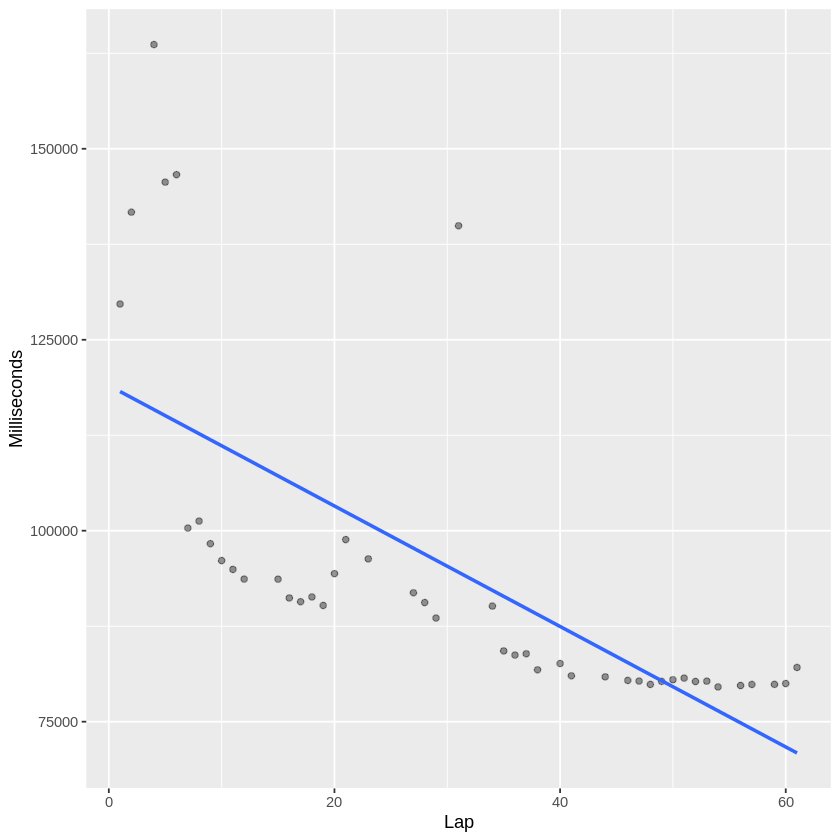

In [7]:
#4. Italy, Imola

ms_imola <- msc_laps %>%
                filter(raceId %in% imola_race_ID) 

ms_imola_clean <- ms_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_imola_clean
ms_imola_clean_ID <- ms_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_imola_races <- msc_laps %>%
                    filter(raceId %in% ms_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()
 
### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1067,56


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5562844,92.71407,1.545235


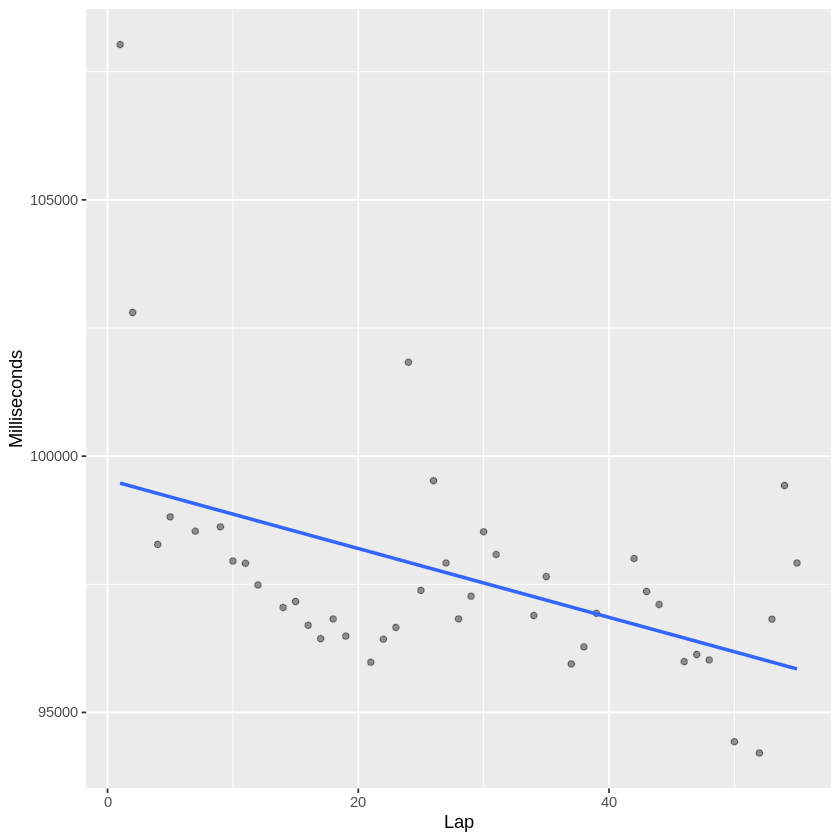

In [8]:
#5. Turkey (Replacing Miami)

ms_turkey <- msc_laps %>%
                filter(raceId %in% turkey_race_ID) 

ms_turkey_clean <- ms_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_turkey_clean
ms_turkey_clean_ID <- ms_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_turkey_races <- msc_laps %>%
                    filter(raceId %in% ms_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()
 
### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1055,64


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5771845,96.19741,1.60329


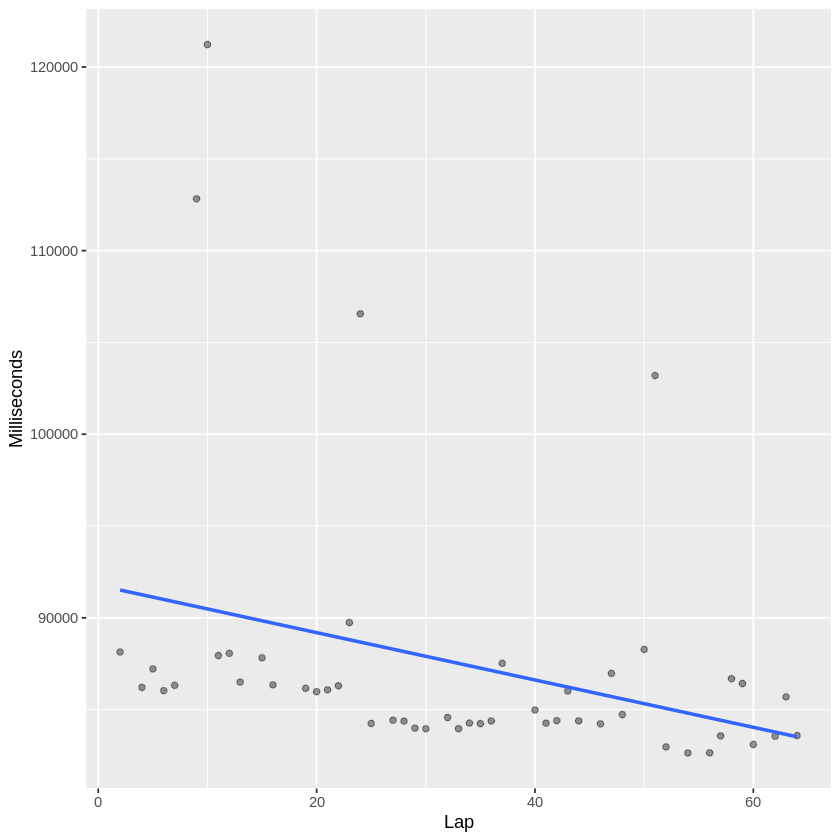

In [9]:
#6. Spain

ms_spain <- msc_laps %>%
                filter(raceId %in% spain_race_ID) 

ms_spain_clean <- ms_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_spain_clean
ms_spain_clean_ID <- ms_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_spain_races <- msc_laps %>%
                    filter(raceId %in% ms_spain_clean_ID)

formulaone_split <- initial_split(ms_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1056,75


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6212047,103.5341,1.725569


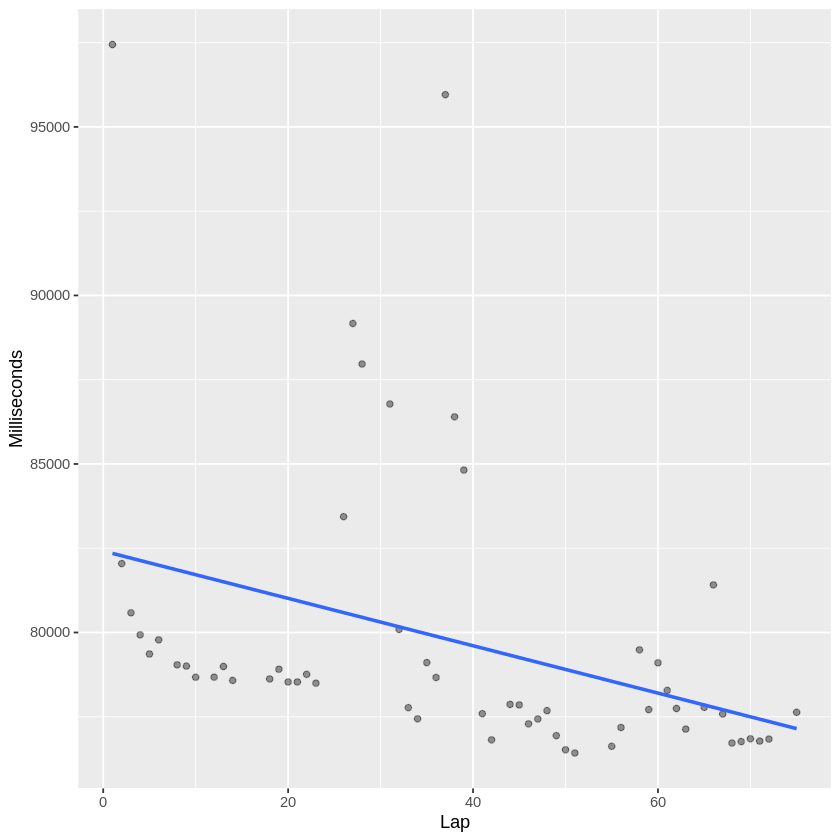

In [10]:
#7. Monaco

ms_monaco <- msc_laps %>%
                filter(raceId %in% monaco_race_ID) 

ms_monaco_clean <- ms_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_monaco_clean
ms_monaco_clean_ID <- ms_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_monaco_races <- msc_laps %>%
                    filter(raceId %in% ms_monaco_clean_ID)

formulaone_split <- initial_split(ms_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6033173,100.5529,1.675881


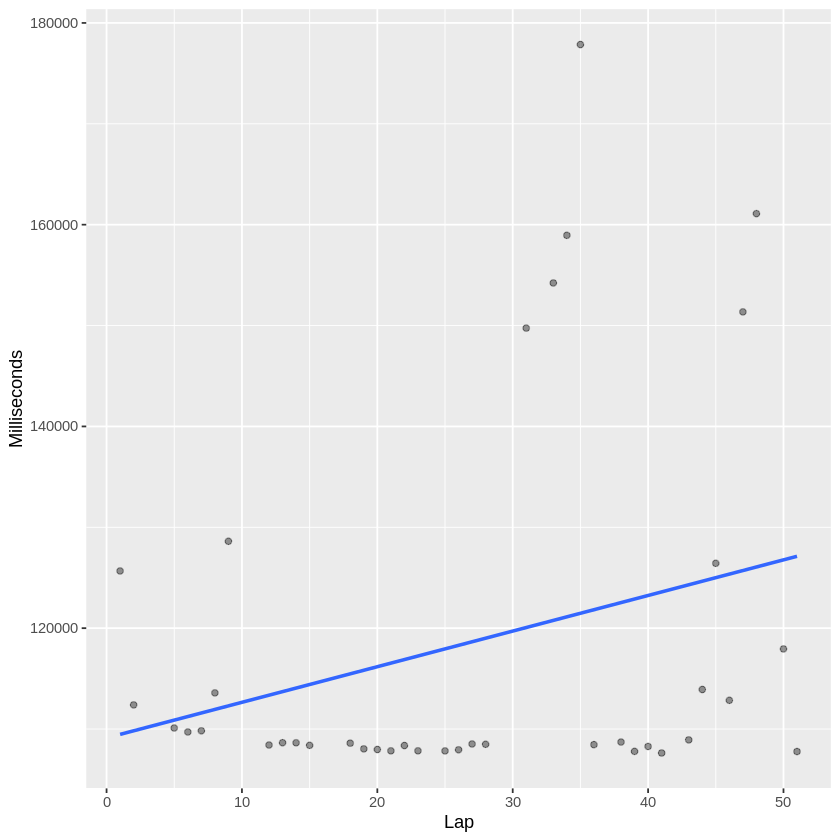

In [11]:
#8. Azerbaijan

ms_azerbaijan <- msc_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

ms_azerbaijan_clean <- ms_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_azerbaijan_clean
ms_azerbaijan_clean_ID <- ms_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_azerbaijan_races <- msc_laps %>%
                    filter(raceId %in% ms_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

In [12]:
#9. Canada

# ms_canada <- msc_laps %>%
#                 filter(raceId %in% canada_race_ID) 

# ms_canada_clean <- ms_canada %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_canada_clean
# ms_canada_clean_ID <- ms_canada_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_canada_races <- msc_laps %>%
#                     filter(raceId %in% ms_canada_clean_ID)

# formulaone_split <- initial_split(ms_canada_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1061,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5054562,84.24271,1.404045


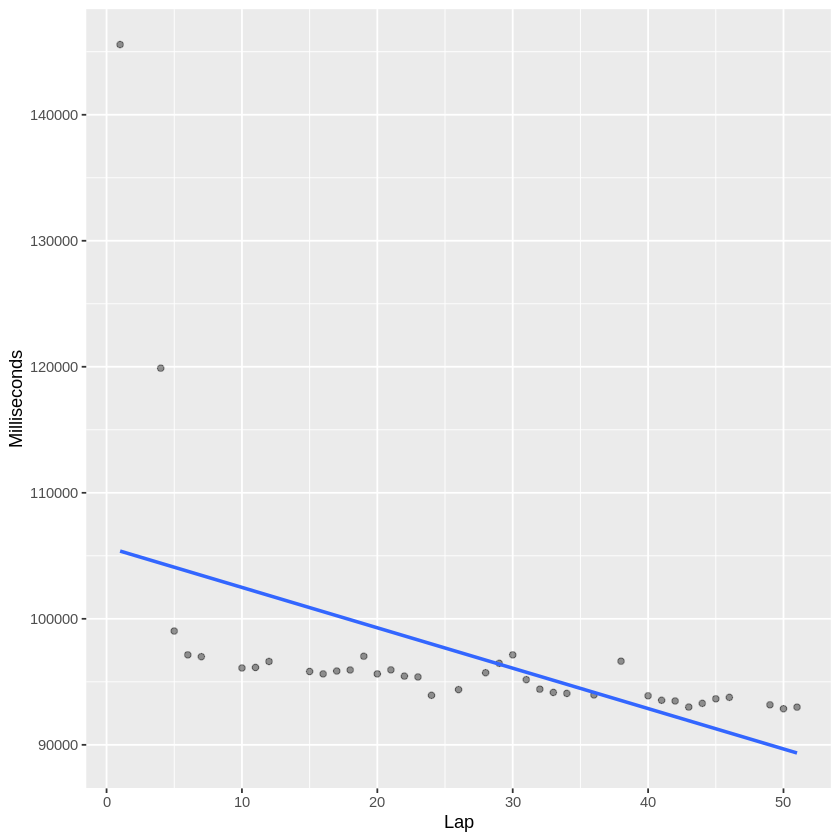

In [13]:
#10. Great Britain

ms_uk <- msc_laps %>%
                filter(raceId %in% uk_race_ID) 

ms_uk_clean <- ms_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_uk_clean
ms_uk_clean_ID <- ms_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_uk_races <- msc_laps %>%
                    filter(raceId %in% ms_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1058,69
1060,69


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5115165,85.25275,1.420879


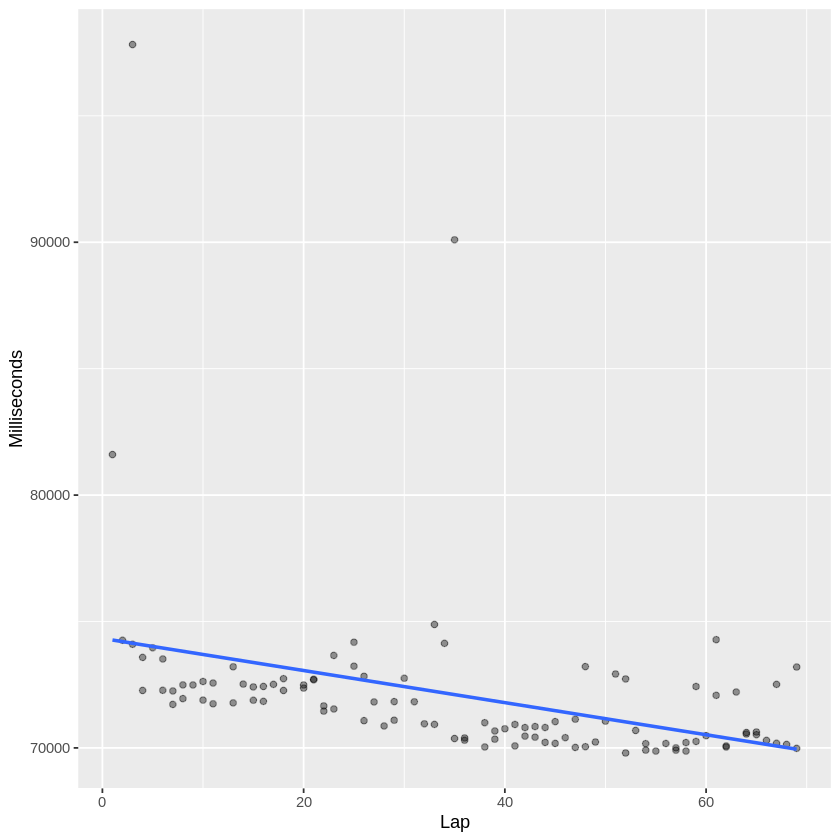

In [14]:
#11. Austria

ms_austria <- msc_laps %>%
                filter(raceId %in% austria_race_ID) 

ms_austria_clean <- ms_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_austria_clean
ms_austria_clean_ID <- ms_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_austria_races <- msc_laps %>%
                    filter(raceId %in% ms_austria_clean_ID)

formulaone_split <- initial_split(ms_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5414225,90.23708,1.503951


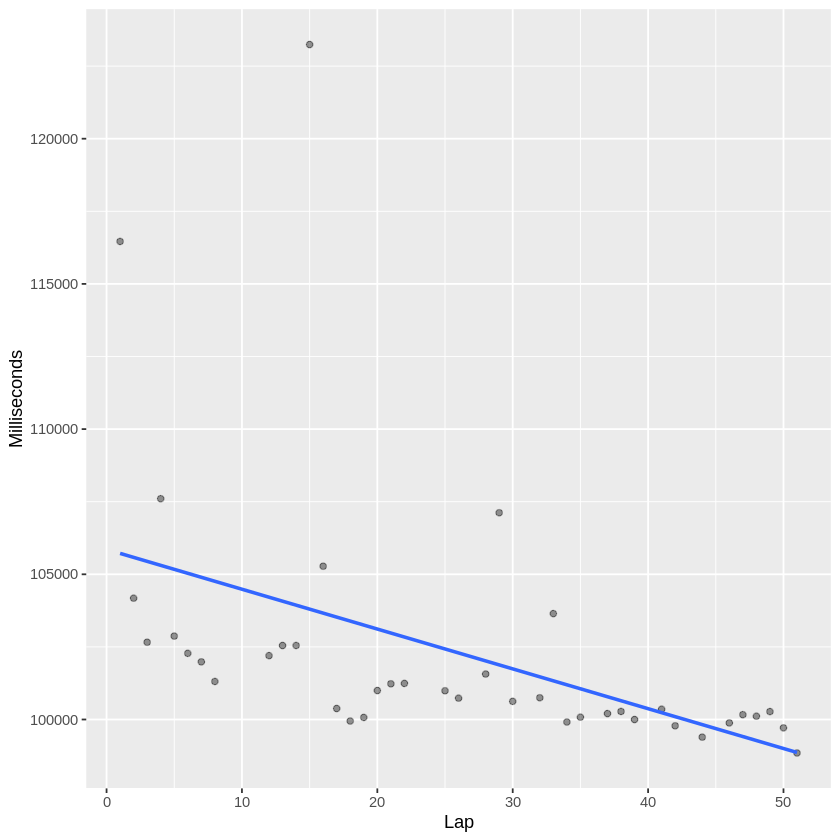

In [26]:
#12. France

ms_france <- msc_laps %>%
                filter(raceId %in% france_race_ID) 

ms_france_clean <- ms_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_france_clean
ms_france_clean_ID <- ms_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_france_races <- msc_laps %>%
                    filter(raceId %in% ms_france_clean_ID)

formulaone_split <- initial_split(ms_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1062,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6048082,100.8014,1.680023


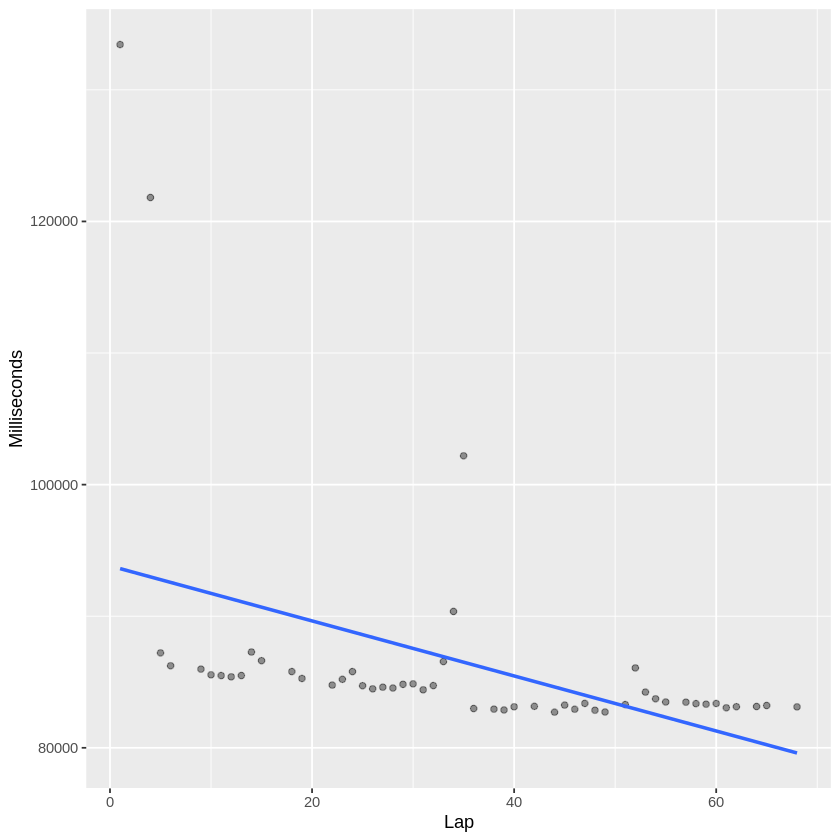

In [16]:
#13. Hungary

ms_hungary <- msc_laps %>%
                filter(raceId %in% hungary_race_ID) 

ms_hungary_clean <- ms_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
ms_hungary_clean
ms_hungary_clean_ID <- ms_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_hungary_races <- msc_laps %>%
                    filter(raceId %in% ms_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(ms_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

In [17]:
#14. Belgium

# ms_belgium <- msc_laps %>%
#                 filter(raceId %in% belgium_race_ID) 

# ms_belgium_clean <- ms_belgium %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_belgium_clean
# ms_belgium_clean_ID <- ms_belgium_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_belgium_races <- msc_laps %>%
#                     filter(raceId %in% ms_belgium_clean_ID)

# formulaone_split <- initial_split(ms_belgium_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5699238,94.98729,1.583122


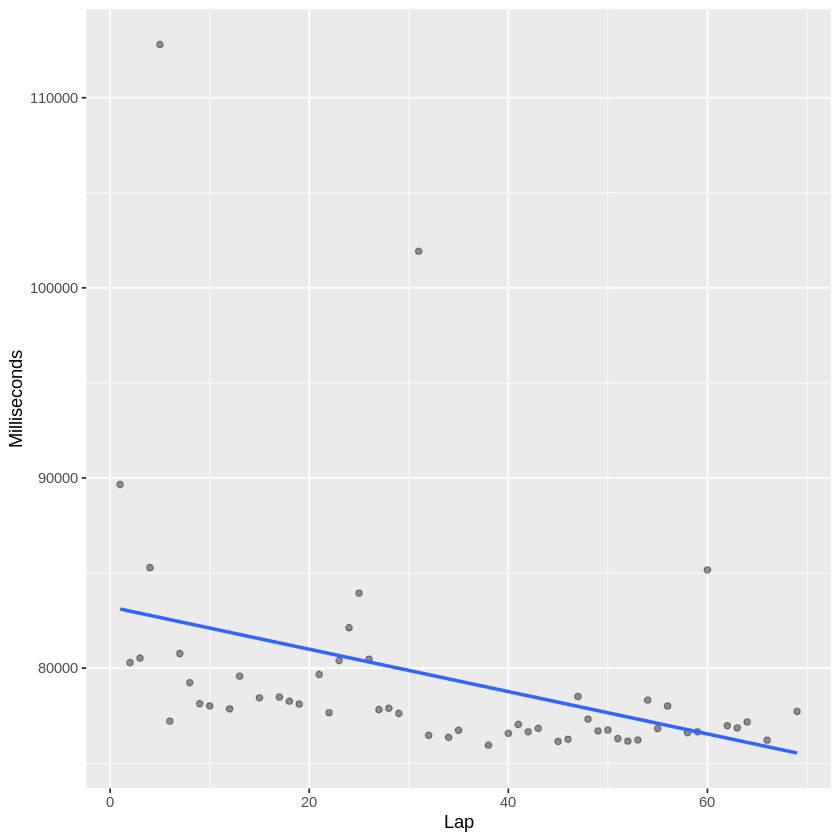

In [18]:
#15. Netherlands

ms_netherlands <- msc_laps %>%
                filter(raceId %in% netherlands_race_ID) 

ms_netherlands_clean <- ms_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_netherlands_clean
ms_netherlands_clean_ID <- ms_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_netherlands_races <- msc_laps %>%
                    filter(raceId %in% ms_netherlands_clean_ID)

formulaone_split <- initial_split(ms_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1065,53


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4957034,82.61723,1.376954


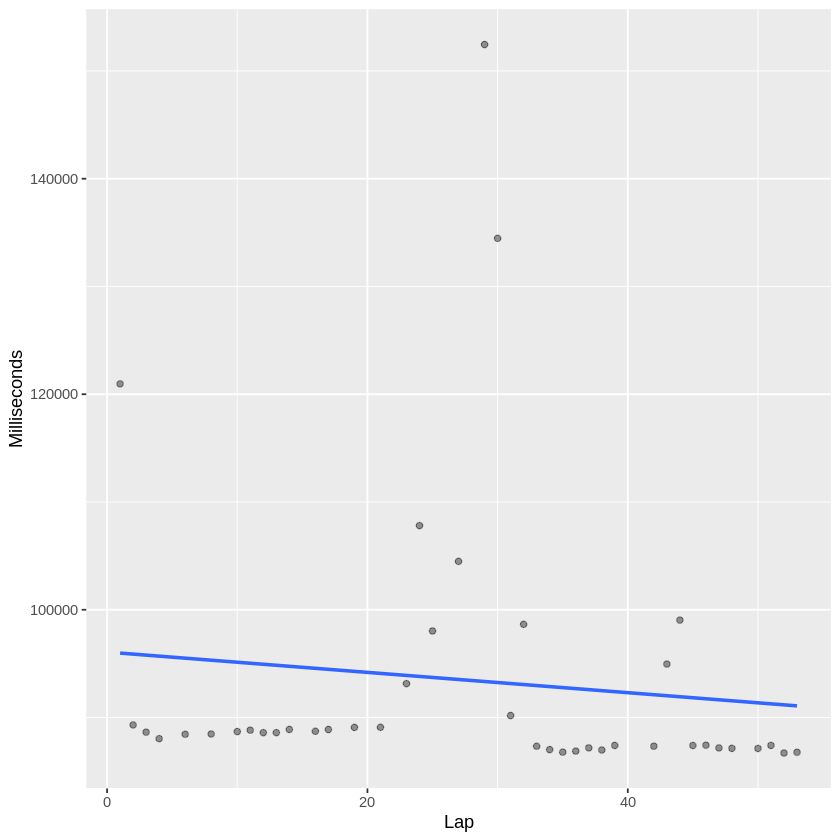

In [19]:
#16. Italy, Monza

ms_monza <- msc_laps %>%
                filter(raceId %in% monza_race_ID) 

ms_monza_clean <- ms_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_monza_clean
ms_monza_clean_ID <- ms_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_monza_races <- msc_laps %>%
                    filter(raceId %in% ms_monza_clean_ID)

formulaone_split <- initial_split(ms_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

In [20]:
#17. Singapore

# ms_singapore <- msc_laps %>%
#                 filter(raceId %in% singapore_race_ID) 

# ms_singapore_clean <- ms_singapore %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_singapore_clean
# ms_singapore_clean_ID <- ms_singapore_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_singapore_races <- msc_laps %>%
#                     filter(raceId %in% ms_singapore_clean_ID)

# formulaone_split <- initial_split(ms_singapore_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_singapore_prediction()

In [21]:
#18. Japan

# ms_japan <- msc_laps %>%
#                 filter(raceId %in% japan_race_ID) 

# ms_japan_clean <- ms_japan %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n))
# ms_japan_clean
# ms_japan_clean_ID <- ms_japan_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_japan_races <- msc_laps %>%
#                     filter(raceId %in% ms_japan_clean_ID)

# formulaone_split <- initial_split(ms_japan_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1069,54


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5883229,98.05382,1.63423


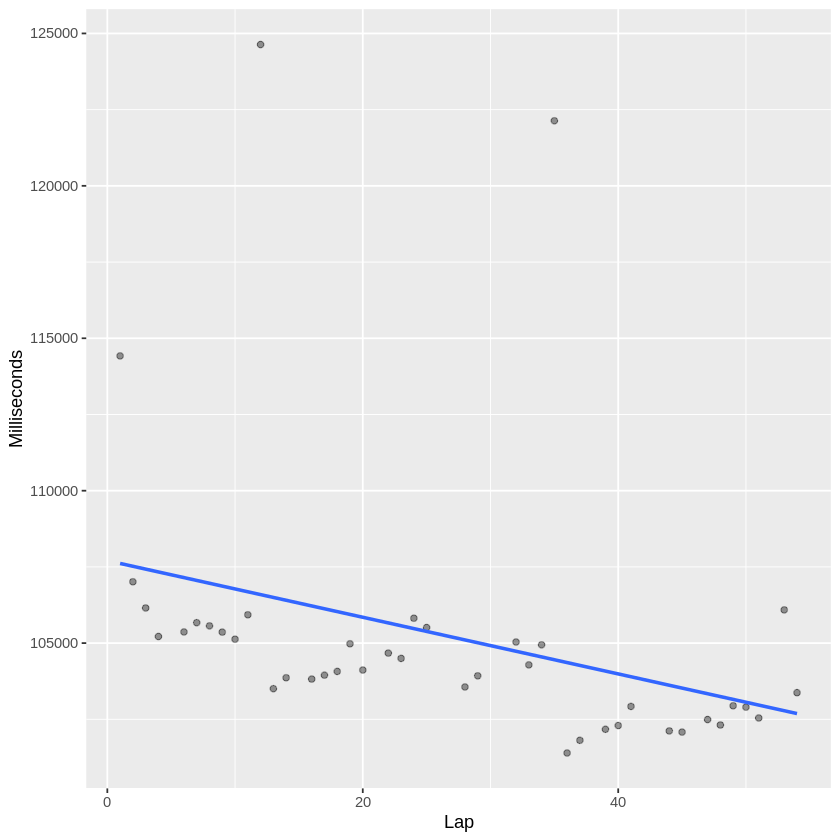

In [22]:
#19. USA, Austin

ms_austin <- msc_laps %>%
                filter(raceId %in% austin_race_ID) 

ms_austin_clean <- ms_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_austin_clean
ms_austin_clean_ID <- ms_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_austin_races <- msc_laps %>%
                    filter(raceId %in% ms_austin_clean_ID)

formulaone_split <- initial_split(ms_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

In [23]:
#20. Mexico

# ms_mexico <- msc_laps %>%
#                 filter(raceId %in% mexico_race_ID) 

# ms_mexico_clean <- ms_mexico %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ms_mexico_clean
# ms_mexico_clean_ID <- ms_mexico_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ms_mexico_races <- msc_laps %>%
#                     filter(raceId %in% ms_mexico_clean_ID)

# formulaone_split <- initial_split(ms_mexico_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1071,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5777044,96.28407,1.604734


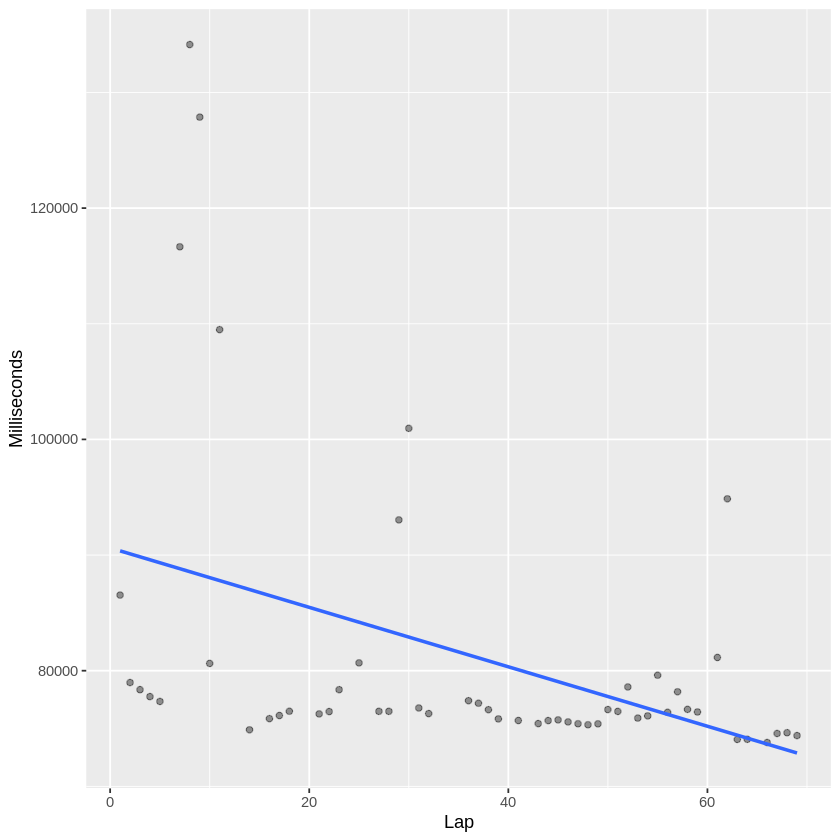

In [24]:
#21. Brazil

ms_brazil <- msc_laps %>%
                filter(raceId %in% brazil_race_ID) 

ms_brazil_clean <- ms_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_brazil_clean
ms_brazil_clean_ID <- ms_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_brazil_races <- msc_laps %>%
                    filter(raceId %in% ms_brazil_clean_ID)

formulaone_split <- initial_split(ms_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1073,57


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5524308,92.0718,1.53453


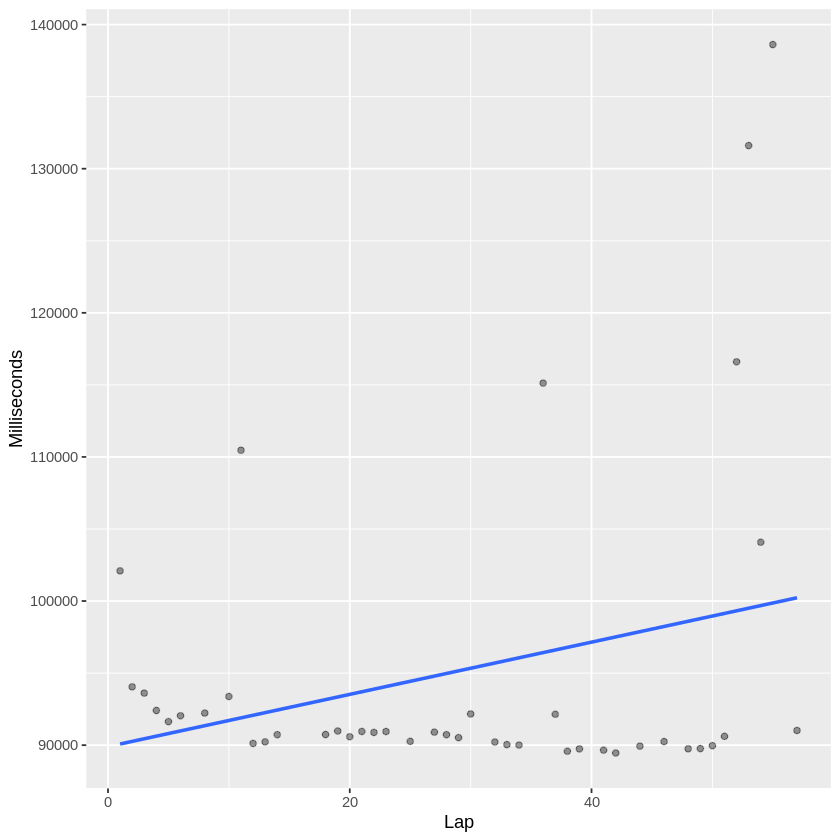

In [25]:
#22. Abu Dhabi

ms_uae <- msc_laps %>%
                filter(raceId %in% uae_race_ID) 

ms_uae_clean <- ms_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_uae_clean
ms_uae_clean_ID <- ms_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_uae_races <- msc_laps %>%
                    filter(raceId %in% ms_uae_clean_ID)

formulaone_split <- initial_split(ms_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()